# Exploring Sleep Health and Lifestyle Data

**About dataset**

Person ID: An identifier for each individual,

Gender: The gender of the person (Male/Female),

Age: The age of the person in years,

Occupation: The occupation or profession of the person,

Sleep Duration (hours): The number of hours the person sleeps per day,

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10,

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily,

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10,

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight),

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure,

Heart Rate (bpm): The resting heart rate of the person in beats per minute. Daily Steps: The number of steps the person takes per day,

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/klaudiasolek/The-analysis-of-sleep-health-and-lifestyle

Cloning into 'The-analysis-of-sleep-health-and-lifestyle'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 58 (delta 30), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (58/58), 633.30 KiB | 1003.00 KiB/s, done.
Resolving deltas: 100% (30/30), done.


**Load data from a CSV file**:

In [5]:
data = pd.read_csv('/content/The-analysis-of-sleep-health-and-lifestyle/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**There are no missing values:**

In [6]:
data.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Quality_of_Sleep         374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


**Unique values in the dataset:**

In [8]:
data['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [9]:
data['BMI_Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [10]:
data['Sleep_Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [11]:
data['Blood_Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

**Data visualization:**

**1) Age histogram**

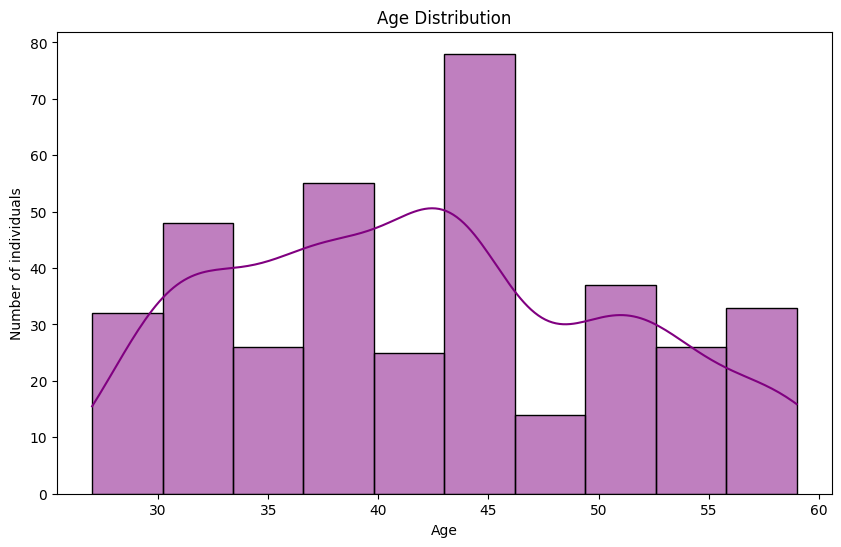

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of individuals')
plt.show()

**2) Correlation matrix**

<ipython-input-13-03b9f5963f17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


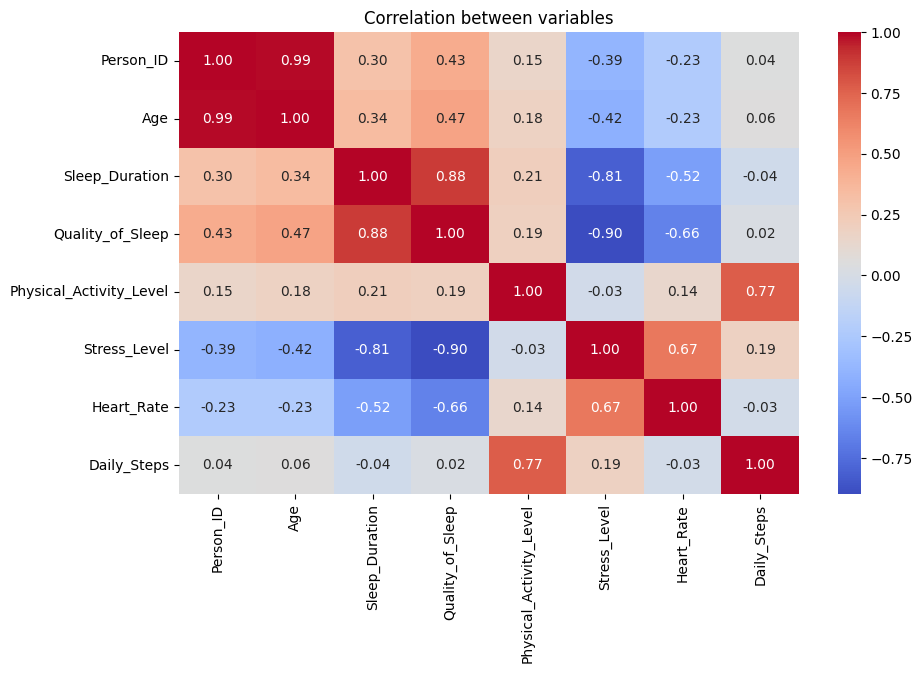

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between variables')
plt.show()

The highest correlation is observed between sleep quality and stress level, followed by the correlation between sleep duration and sleep quality, sleep duration and stress level, daily step count and physical activity level, stress level and heart rate, and sleep quality and heart rate.

**3) Scatter plot of the relationship between sleep quality and stress**

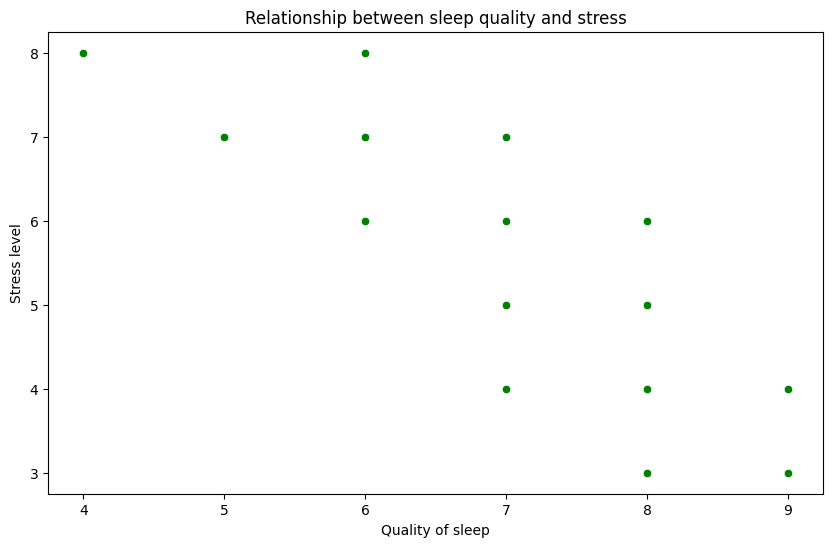

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Quality_of_Sleep', y='Stress_Level', color='green')
plt.title('Relationship between sleep quality and stress')
plt.xlabel('Quality of sleep')
plt.ylabel('Stress level')
plt.show()

The better the quality of sleep, the lower the level of stress. This means that when the sleep quality improves, the stress level tends to decrease, indicating a strong negative correlation between these two factors.

**4) Box plot of sleep duration by gender**

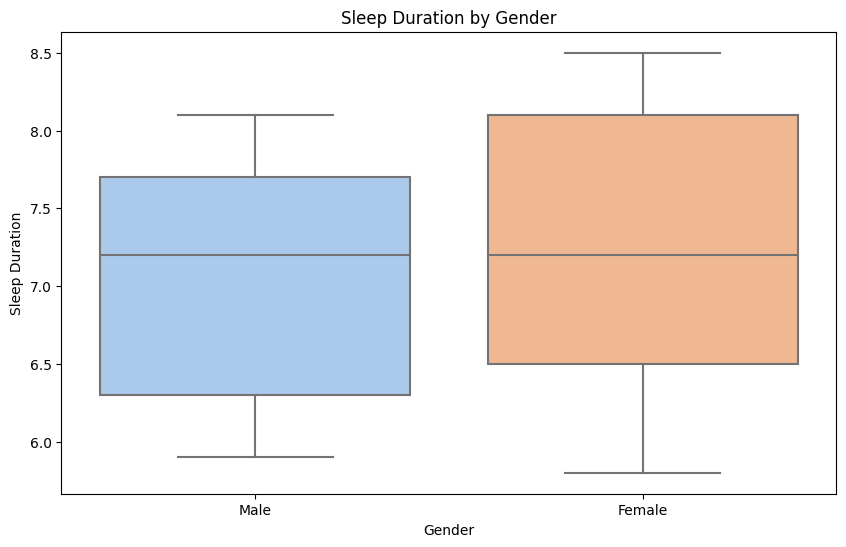

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Sleep_Duration', palette='pastel')
plt.title('Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()

The median sleep duration is the same for both genders, but the first quartile, third quartile, and maximum value are higher for women. In general, the box plot suggests that women tend to have longer sleep durations than men while maintaining a similar median.

**5) Relationship between age, sleep duration and stress level**

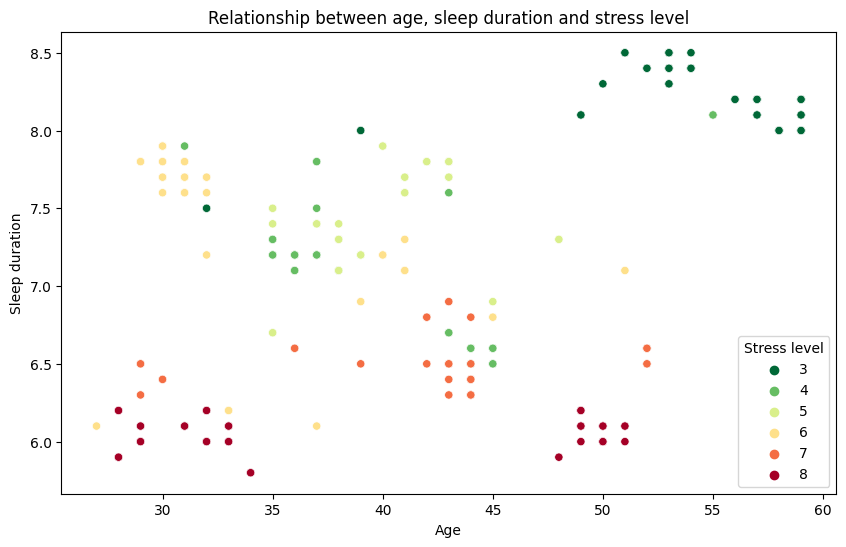

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Sleep_Duration', hue='Stress_Level', palette='RdYlGn_r')
plt.title('Relationship between age, sleep duration and stress level')
plt.xlabel('Age')
plt.ylabel('Sleep duration')
plt.legend(title='Stress level')
plt.show()

People above 47 years of age exhibit extreme stress levels, either the highest (8) or the lowest (3). Below this age, stress levels in individuals are more varied. There is virtually no occurrence of a low stress level of 3 in the age range below 45 years. Conversely, the stress level of 8 is absent in the age range of 35-47. In individuals below the age of 47, sleep duration varies more widely.

**6) Pie chart of sleep disorders distribution**

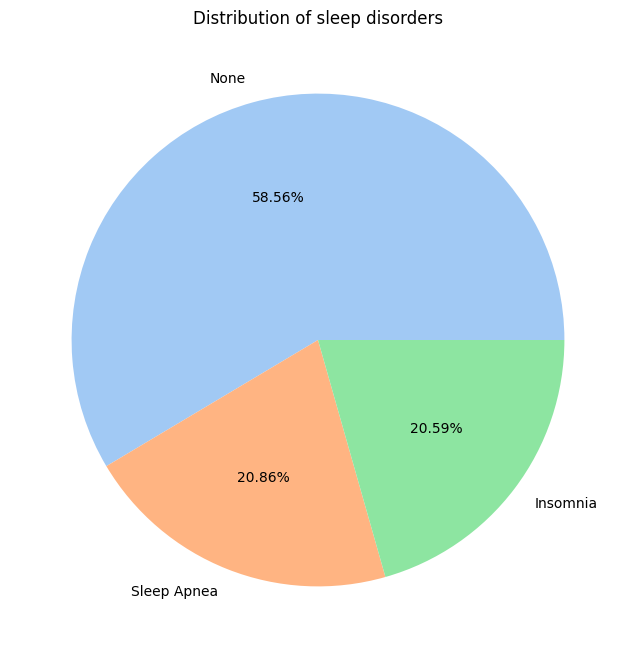

In [20]:
sleep_disorder_counts = data['Sleep_Disorder'].value_counts()
custom_colors = sns.color_palette("pastel")
plt.figure(figsize=(8, 8))
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%.2f%%', colors=custom_colors)
plt.title('Distribution of sleep disorders')
plt.show()

* 58.56% of individuals in the examined dataset do not have any sleep disorders
* 20.59% of individuals are diagnosed with insomnia
* 20.86% of individuals suffer from sleep apnea

**Examples of filtering and grouping:**

In [21]:
age_group = data[(data['Age'] >= 30) & (data['Age'] <= 50)]
average_stress = age_group['Stress_Level'].mean()
print(f'Average Stress Level for ages 30-50: {average_stress:.2f}')

Average Stress Level for ages 30-50: 5.75


Individuals between the ages of 30 and 50 have average stress level of 5.75. This indicates a moderate level of stress within this age group.

In [22]:
overweight_data = data[data['BMI_Category'] == 'Overweight']
gender_distribution = overweight_data['Gender'].value_counts()
print('Gender distribution in overweight category BMI:')
print(gender_distribution)

Gender distribution in overweight category BMI:
Female    106
Male       42
Name: Gender, dtype: int64


Within the "Overweight" BMI category, there are more females (106) than males (42). This suggests that a higher proportion of overweight individuals are female.

In [23]:
good_quality_sleep = data[data['Quality_of_Sleep'] > 7]
long_sleep = good_quality_sleep[good_quality_sleep['Sleep_Duration'] >= 7]
print(f'Number of individuals with good quality sleep and long sleep duration: {len(long_sleep)}')

Number of individuals with good quality sleep and long sleep duration: 180


Among the individuals with good quality sleep (Quality of sleep > 7), there are 180 people who also have a long sleep duration (Sleep duration >= 7 hours). This could indicate that good sleep quality often correlates with longer sleep duration

In [24]:
occupation_heart_rate = data.groupby('Occupation')['Heart_Rate'].mean()
occupation_heart_rate = occupation_heart_rate.sort_values(ascending=False)
print('Average heart rate by occupation:')
print(occupation_heart_rate)

Average heart rate by occupation:
Occupation
Sales Representative    85.000000
Scientist               78.500000
Software Engineer       75.500000
Manager                 75.000000
Nurse                   72.000000
Salesperson             72.000000
Doctor                  71.521127
Lawyer                  69.638298
Accountant              68.864865
Teacher                 67.225000
Engineer                67.190476
Name: Heart_Rate, dtype: float64


The average heart rate varies by occupation, with some occupations having higher average heart rates than others.
Sales Representatives have the highest average heart rate at 85 beats per minute, while Engineers have an average heart rate of 67.19 beats per minute.
This variation in heart rate by occupation could be due to the nature of the work or other factors specific to each profession.